In [75]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

df_irises = pd.read_csv("train_iris.csv" ,index_col=0)


In [76]:
df_irises.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [77]:
y = df_irises['species']    
X = df_irises.iloc[:,1:5]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [78]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for depth in max_depth_values:
 
    clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=depth)
 
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    add = pd.DataFrame({'max_depth':[depth],'test_score':[test_score],'train_score':[train_score]})
    scores_data = scores_data.append(add)
scores_data.head()

,max_depth,test_score,train_score
0,1,0.666667,0.716418
0,2,1.000000,1.000000
0,3,1.000000,1.000000
0,4,0.909091,1.000000
0,5,1.000000,1.000000


In [79]:
scores_data = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['test_score','train_score'], var_name = 'type',value_name = 'score')
scores_data

,max_depth,type,score
0,1,test_score,0.666667
1,2,test_score,1.000000
2,3,test_score,1.000000
3,4,test_score,0.909091
4,5,test_score,1.000000
...,...,...,...
193,95,train_score,1.000000
194,96,train_score,1.000000
195,97,train_score,1.000000
196,98,train_score,1.000000


<AxesSubplot:xlabel='max_depth', ylabel='score'>

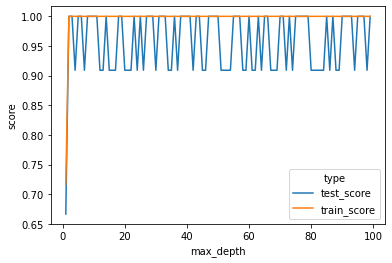

In [80]:
sns.lineplot(x = 'max_depth',y = 'score', hue = 'type', data = scores_data)